# Clean CSV

1) Removing Duplicates
2) Eliminate unnecesary data
3) Ensure Overall Consistency
4) Handle Missing Values
5) Fixing Errors
6) Handling Outliers by using Boxplots

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('data.csv', encoding='ISO-8859-1')

df

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,Poco,Pad 5G 128GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"PKR 66,220","INR 23,999","CNY 2,099",USD 280,"AED 1,029",2024
926,Poco,Pad 5G 256GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"PKR 71,220","INR 25,999","CNY 2,299",USD 300,"AED 1,099",2024
927,Samsung,Galaxy Z Fold6 256GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"PKR 604,999","INR 164,999","ï¿½13,999","USD 1,899","AED 7,199",2024
928,Samsung,Galaxy Z Fold6 512GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"PKR 544,999","INR 176,999","CNY 15,999",USD 1719,"AED 7,699",2024


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Name               930 non-null    object
 1   Model Name                 930 non-null    object
 2   Mobile Weight              930 non-null    object
 3   RAM                        927 non-null    object
 4   Front Camera               930 non-null    object
 5   Back Camera                930 non-null    object
 6   Processor                  930 non-null    object
 7   Battery Capacity           930 non-null    object
 8   Screen Size                930 non-null    object
 9   Launched Price (Pakistan)  930 non-null    object
 10  Launched Price (India)     930 non-null    object
 11  Launched Price (China)     930 non-null    object
 12  Launched Price (USA)       930 non-null    object
 13  Launched Price (Dubai)     930 non-null    object
 14  Launched Y

In [5]:
column_list=list(df.columns)
column_list

['Company Name',
 'Model Name',
 'Mobile Weight',
 'RAM',
 'Front Camera',
 'Back Camera',
 'Processor',
 'Battery Capacity',
 'Screen Size',
 'Launched Price (Pakistan)',
 'Launched Price (India)',
 'Launched Price (China)',
 'Launched Price (USA)',
 'Launched Price (Dubai)',
 'Launched Year']

In [6]:
df.drop(columns='Launched Price (Pakistan)', inplace=True)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Company Name            930 non-null    object
 1   Model Name              930 non-null    object
 2   Mobile Weight           930 non-null    object
 3   RAM                     927 non-null    object
 4   Front Camera            930 non-null    object
 5   Back Camera             930 non-null    object
 6   Processor               930 non-null    object
 7   Battery Capacity        930 non-null    object
 8   Screen Size             930 non-null    object
 9   Launched Price (India)  930 non-null    object
 10  Launched Price (China)  930 non-null    object
 11  Launched Price (USA)    930 non-null    object
 12  Launched Price (Dubai)  930 non-null    object
 13  Launched Year           930 non-null    int64 
dtypes: int64(1), object(13)
memory usage: 101.8+ KB


,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,Poco,Pad 5G 128GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"INR 23,999","CNY 2,099",USD 280,"AED 1,029",2024
926,Poco,Pad 5G 256GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"INR 25,999","CNY 2,299",USD 300,"AED 1,099",2024
927,Samsung,Galaxy Z Fold6 256GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"INR 164,999","ï¿½13,999","USD 1,899","AED 7,199",2024
928,Samsung,Galaxy Z Fold6 512GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"INR 176,999","CNY 15,999",USD 1719,"AED 7,699",2024


In [7]:
df.isna().sum()

Company Name              0
Model Name                0
Mobile Weight             0
RAM                       3
Front Camera              0
Back Camera               0
Processor                 0
Battery Capacity          0
Screen Size               0
Launched Price (India)    0
Launched Price (China)    0
Launched Price (USA)      0
Launched Price (Dubai)    0
Launched Year             0
dtype: int64

In [8]:
#Dropping the N/A's in the RAM column
df=df.dropna(subset=["RAM"])

In [9]:
#Checking for any N/A values again and if they been dropped
df.isna().sum()

Company Name              0
Model Name                0
Mobile Weight             0
RAM                       0
Front Camera              0
Back Camera               0
Processor                 0
Battery Capacity          0
Screen Size               0
Launched Price (India)    0
Launched Price (China)    0
Launched Price (USA)      0
Launched Price (Dubai)    0
Launched Year             0
dtype: int64

In [10]:
#Check duplicates in the colums
df.duplicated('Model Name').sum()

22

In [11]:
#drop the duplicates model names
df.drop_duplicates(subset='Model Name', keep='first', inplace=True)
df.duplicated('Model Name').sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 905 entries, 0 to 929
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Company Name            905 non-null    object
 1   Model Name              905 non-null    object
 2   Mobile Weight           905 non-null    object
 3   RAM                     905 non-null    object
 4   Front Camera            905 non-null    object
 5   Back Camera             905 non-null    object
 6   Processor               905 non-null    object
 7   Battery Capacity        905 non-null    object
 8   Screen Size             905 non-null    object
 9   Launched Price (India)  905 non-null    object
 10  Launched Price (China)  905 non-null    object
 11  Launched Price (USA)    905 non-null    object
 12  Launched Price (Dubai)  905 non-null    object
 13  Launched Year           905 non-null    int64 
dtypes: int64(1), object(13)
memory usage: 106.1+ KB


In [13]:
df.describe()

,Launched Year
count,905.000000
mean,2022.194475
std,1.874306
min,2014.000000
25%,2021.000000
50%,2023.000000
75%,2024.000000
max,2025.000000


## Visualizations

Text(0.5, 1.0, 'Percentage of Brands in the Dataset')

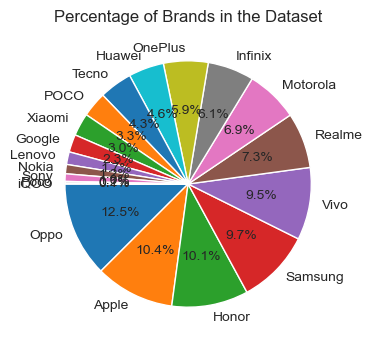

In [17]:
sns.set_style('darkgrid')
plt.figure(figsize=(6,4))
plt.pie(df['Company Name'].value_counts(), labels=df['Company Name'].value_counts().index, autopct='%1.1f%%', startangle=180)
plt.title('Percentage of Brands in the Dataset')

In [26]:
df['Company Name'].nunique()

19

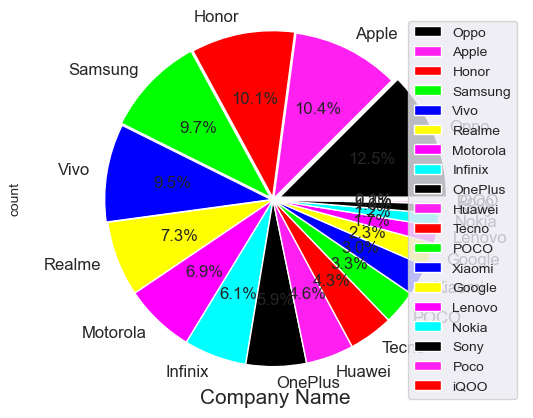

In [44]:
#Libraries for colors and visuals
#vibrant colors except white and black
colors=['#000001','#FF1FF1','#FF0000','#00FF00','#0000FF','#FFFF00','#FF00FF','#00FFFF']

cnt=df['Company Name'].value_counts()
#19 companies
explode=(0.043,0.01,0.015,0.02,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0)

cnt.plot(kind='pie', fontsize=12, explode=explode, autopct='%1.1f%%', colors=colors)
plt.xlabel('Company Name',fontsize=15)
plt.axis('equal')
plt.legend(labels=cnt.index, loc='upper right')
plt.show()

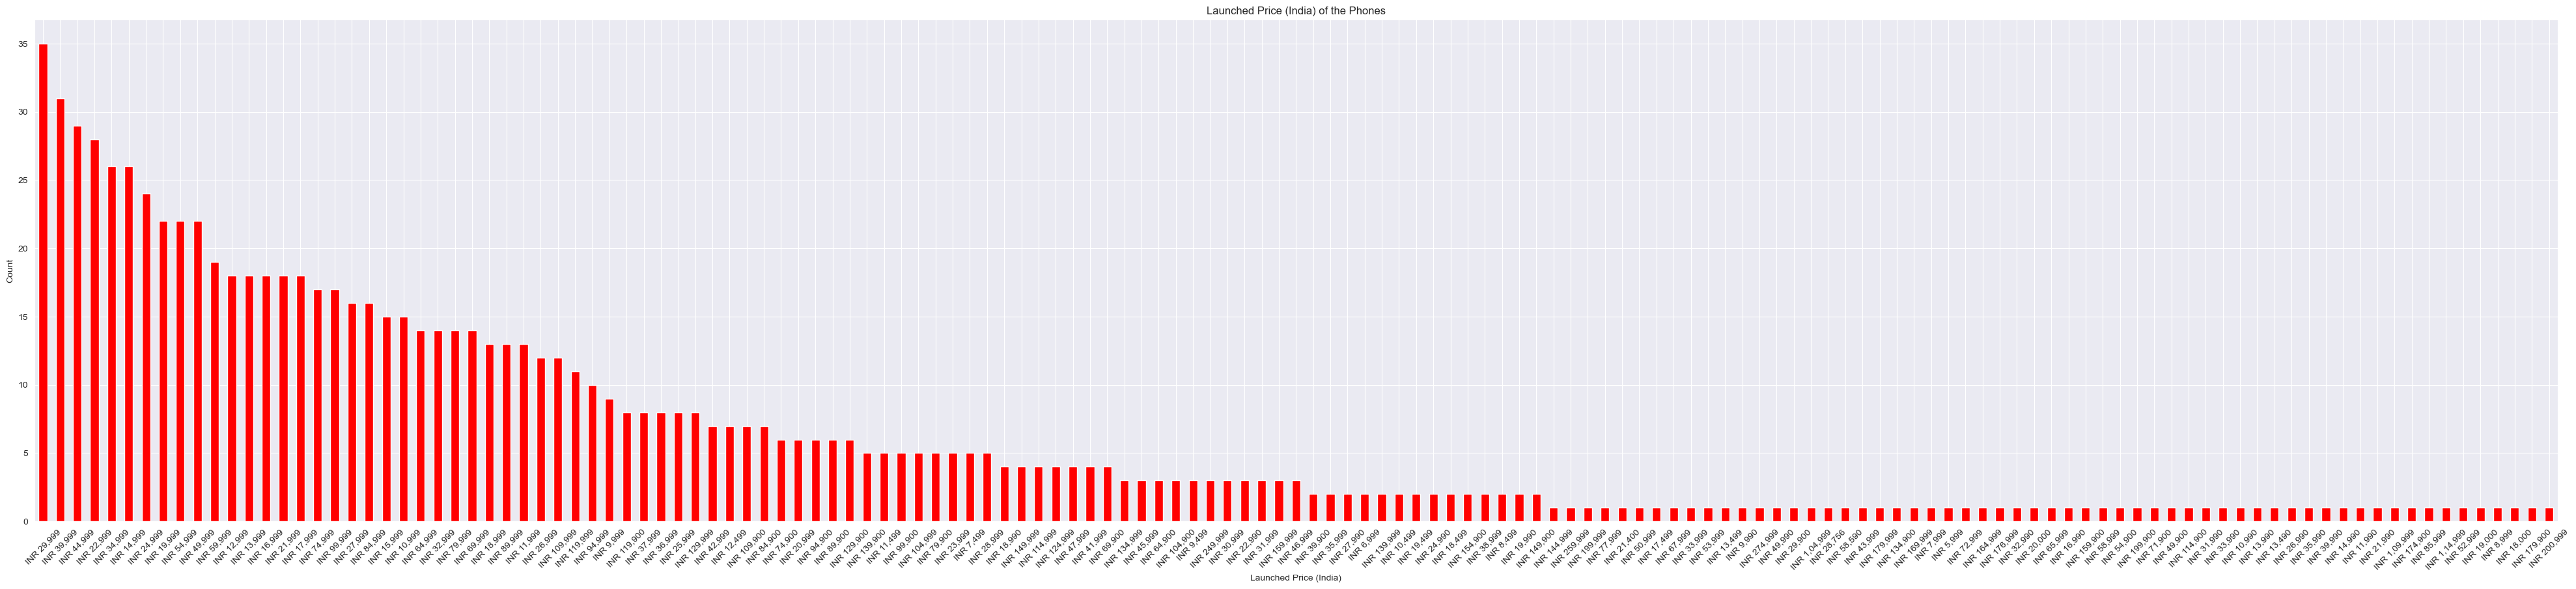

In [56]:
cnt=df['Launched Price (India)'].value_counts()

plt.figure(figsize=(50,10))
cnt.plot(kind='bar',color='red')
plt.title('Launched Price (India) of the Phones')
plt.xlabel('Launched Price (India)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()